<ipython-input-2-ebeb831d6381>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[23157.   9870.   6021.  21825.  13669.5 28080.   3129.   7539.  18003.
 59461.5 30744.  18112.5 23458.5 30600.  46084.5  9102.   6487.5  6142.5
 10515.   8844.  25413.  43290.  17304.  56220.  18967.5 20664.  36487.5
 27174.  19012.5 51624.  22491.  12576.  17712.  19887.   8430.  37642.5
 13224.   9825.  17784.  47700.  48997.5 11517.  38070.  11062.5 34299.
 11070.  21973.5  5557.5 31668.   8662.5 26595.  11124.  25399.5  6787.5
  3105.  33574.5 24846.  16215.  41412.  13056.  17550.  11928.  29394.
 15132.  24034.5  7239.  54990.  44956.5 22333.5  8895.  10635.   7057.5
 23100.   1089.   8469.  13851.  11932.5 10632.  25938.  14910.  26460.
 23662.5 21690.  11724.  29406.  20592.  23512.5 42288.  22320.  52582.5
  6000.   7731.   1501.5 36241.5 51070.5 34507.5 28350.  56964.  13567.5
 16440.  10926.  19008.  35040.   641

First 10 rows of the dataset:
        Date     Product     Category  Units Sold  Revenue
0 2024-01-01      Laptop  Electronics          43 23005.00
1 2024-01-01  Smartphone  Electronics          33 12210.00
2 2024-01-01      Tablet  Electronics          47  8037.00
3 2024-01-01  Headphones  Accessories          25 17850.00
4 2024-01-01  Smartwatch    Wearables          23  7222.00
5 2024-01-02      Laptop  Electronics          15  8370.00
6 2024-01-02  Smartphone  Electronics          28 13216.00
7 2024-01-02      Tablet  Electronics          40 38840.00
8 2024-01-02  Headphones  Accessories          28  6440.00
9 2024-01-02  Smartwatch    Wearables          26 10608.00


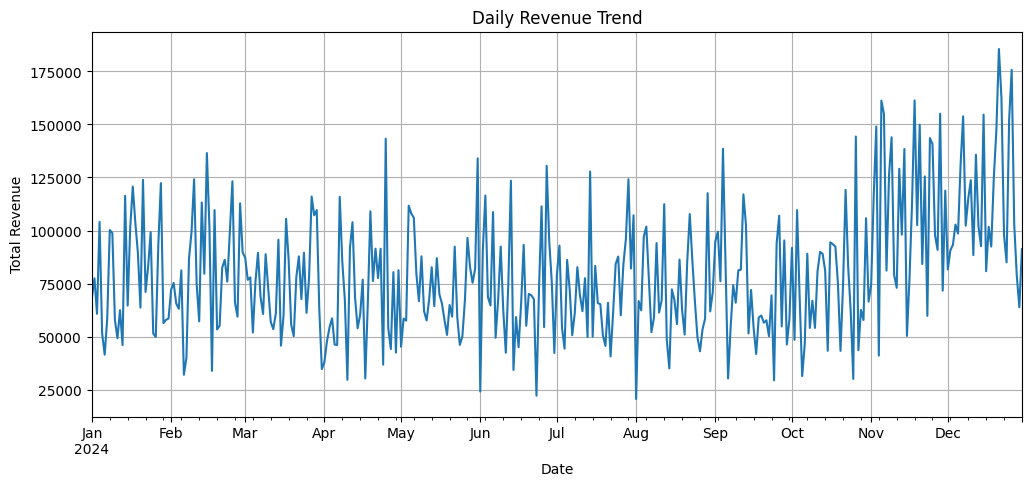

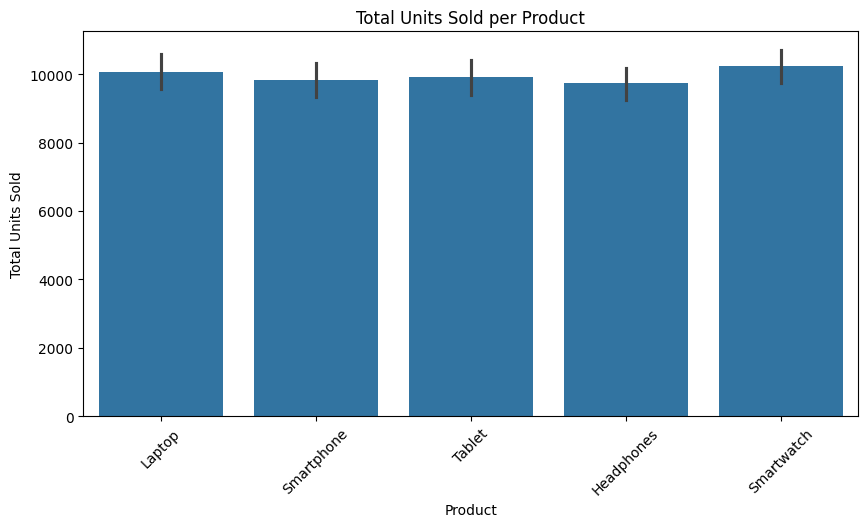

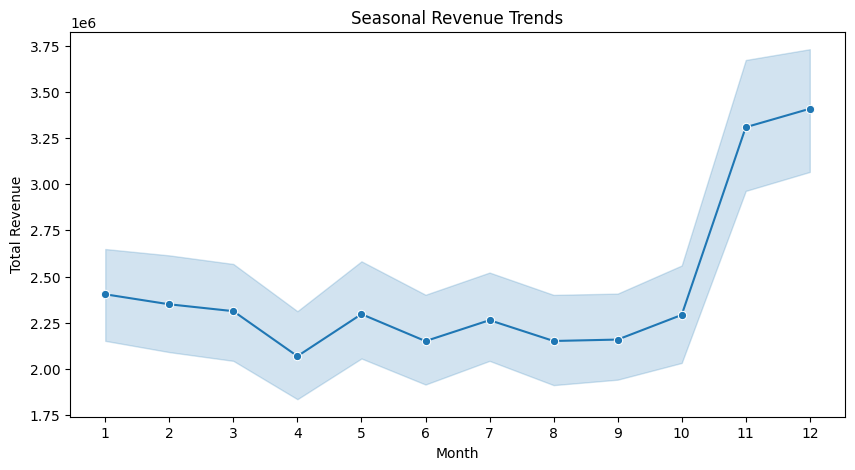

Dataset saved as sales_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate date range for a full year
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')

# Define product categories and their types
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch']
categories = ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Wearables']

# Initialize an empty list to store sales data
sales_data = []

# Generate synthetic sales data
for date in dates:
    for i, product in enumerate(products):
        units_sold = np.random.randint(5, 50)  # Generate random demand between 5 and 50 units
        price = np.random.randint(100, 1000)  # Generate random price between 100 and 1000
        revenue = units_sold * price  # Calculate revenue
        sales_data.append([date, product, categories[i], units_sold, revenue])

# Create a DataFrame from the generated sales data
df = pd.DataFrame(sales_data, columns=['Date', 'Product', 'Category', 'Units Sold', 'Revenue'])

# Introduce seasonality: Increase revenue by 50% for sales in November and December
df.loc[df['Date'].dt.month.isin([11, 12]), 'Revenue'] *= 1.5

# Display first 10 rows of the dataset for verification
print("First 10 rows of the dataset:")
print(df.head(10))

# Adjust display settings for better clarity in Google Colab
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

# Function to plot daily revenue trend
def plot_revenue_trend():
    plt.figure(figsize=(12, 5))
    df.groupby('Date')['Revenue'].sum().plot()
    plt.title('Daily Revenue Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.grid()
    plt.show()

# Function to visualize total units sold per product
def plot_product_demand():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df['Product'], y=df['Units Sold'], estimator=sum)
    plt.title('Total Units Sold per Product')
    plt.ylabel('Total Units Sold')
    plt.xticks(rotation=45)
    plt.show()

# Function to visualize seasonal revenue trends
def plot_seasonal_trends():
    df['Month'] = df['Date'].dt.month  # Extract month from date
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Month', y='Revenue', data=df, estimator=sum, marker='o')
    plt.title('Seasonal Revenue Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.xticks(range(1, 13))  # Set x-axis labels from 1 to 12 (months)
    plt.show()

# Call the functions to generate visualizations
plot_revenue_trend()
plot_product_demand()
plot_seasonal_trends()

# Save the dataset as a CSV file
df.to_csv('sales_data.csv', index=False)
print("Dataset saved as sales_data.csv")
